In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Import necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()


Saving kidney-stone-dataset.csv to kidney-stone-dataset.csv


In [ ]:
import io

# Read the CSV file
df = pd.read_csv(io.StringIO(uploaded['kidney-stone-dataset.csv'].decode('utf-8')))


In [ ]:
df.shape

(90, 8)

In [ ]:
df.head()

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,0,1.021,4.91,725,14.0,443,2.45,0
1,1,1.017,5.74,577,20.0,296,4.49,0
2,2,1.008,7.20,321,14.9,101,2.36,0
3,3,1.011,5.51,408,12.6,224,2.15,0
4,4,1.005,6.52,187,7.5,91,1.16,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  90 non-null     int64  
 1   gravity     90 non-null     float64
 2   ph          90 non-null     float64
 3   osmo        90 non-null     int64  
 4   cond        90 non-null     float64
 5   urea        90 non-null     int64  
 6   calc        90 non-null     float64
 7   target      90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [ ]:
df.describe()

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,44.500000,1.017952,6.036651,602.333333,20.621687,258.200000,4.017788,0.500000
std,26.124701,0.006780,0.711801,238.459805,7.654448,135.381127,3.016273,0.502801
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,22.250000,1.012258,5.536520,411.500000,14.150000,148.250000,1.412500,0.000000
50%,44.500000,1.018000,5.936247,572.000000,21.177172,231.500000,3.230000,0.500000
75%,66.750000,1.023000,6.490000,778.000000,26.075000,366.250000,5.965127,1.000000
max,89.000000,1.034000,7.940000,1236.000000,38.000000,620.000000,13.000000,1.000000


In [ ]:
df.isnull().sum()

Unnamed: 0    0
gravity       0
ph            0
osmo          0
cond          0
urea          0
calc          0
target        0
dtype: int64

In [ ]:
# Drop irelevent coloum to prepare the data for model development
df.drop(columns = ["Unnamed: 0"], inplace=True)

In [ ]:
df['target'].value_counts()

0    45
1    45
Name: target, dtype: int64

In [ ]:
# We can see that from target value counts Label data is balanced type of data as values falls 50% in both Class (0 & 1)

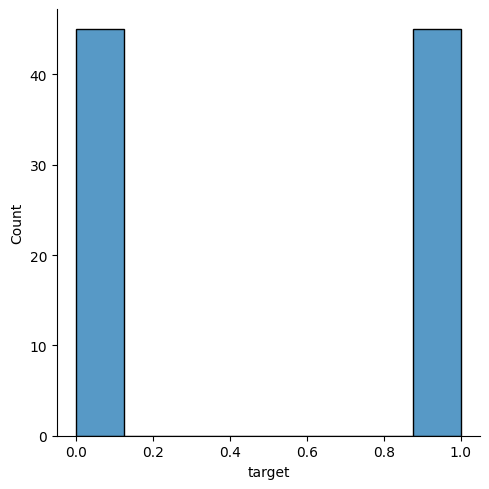

In [ ]:
sns.displot(df['target'])
plt.show()

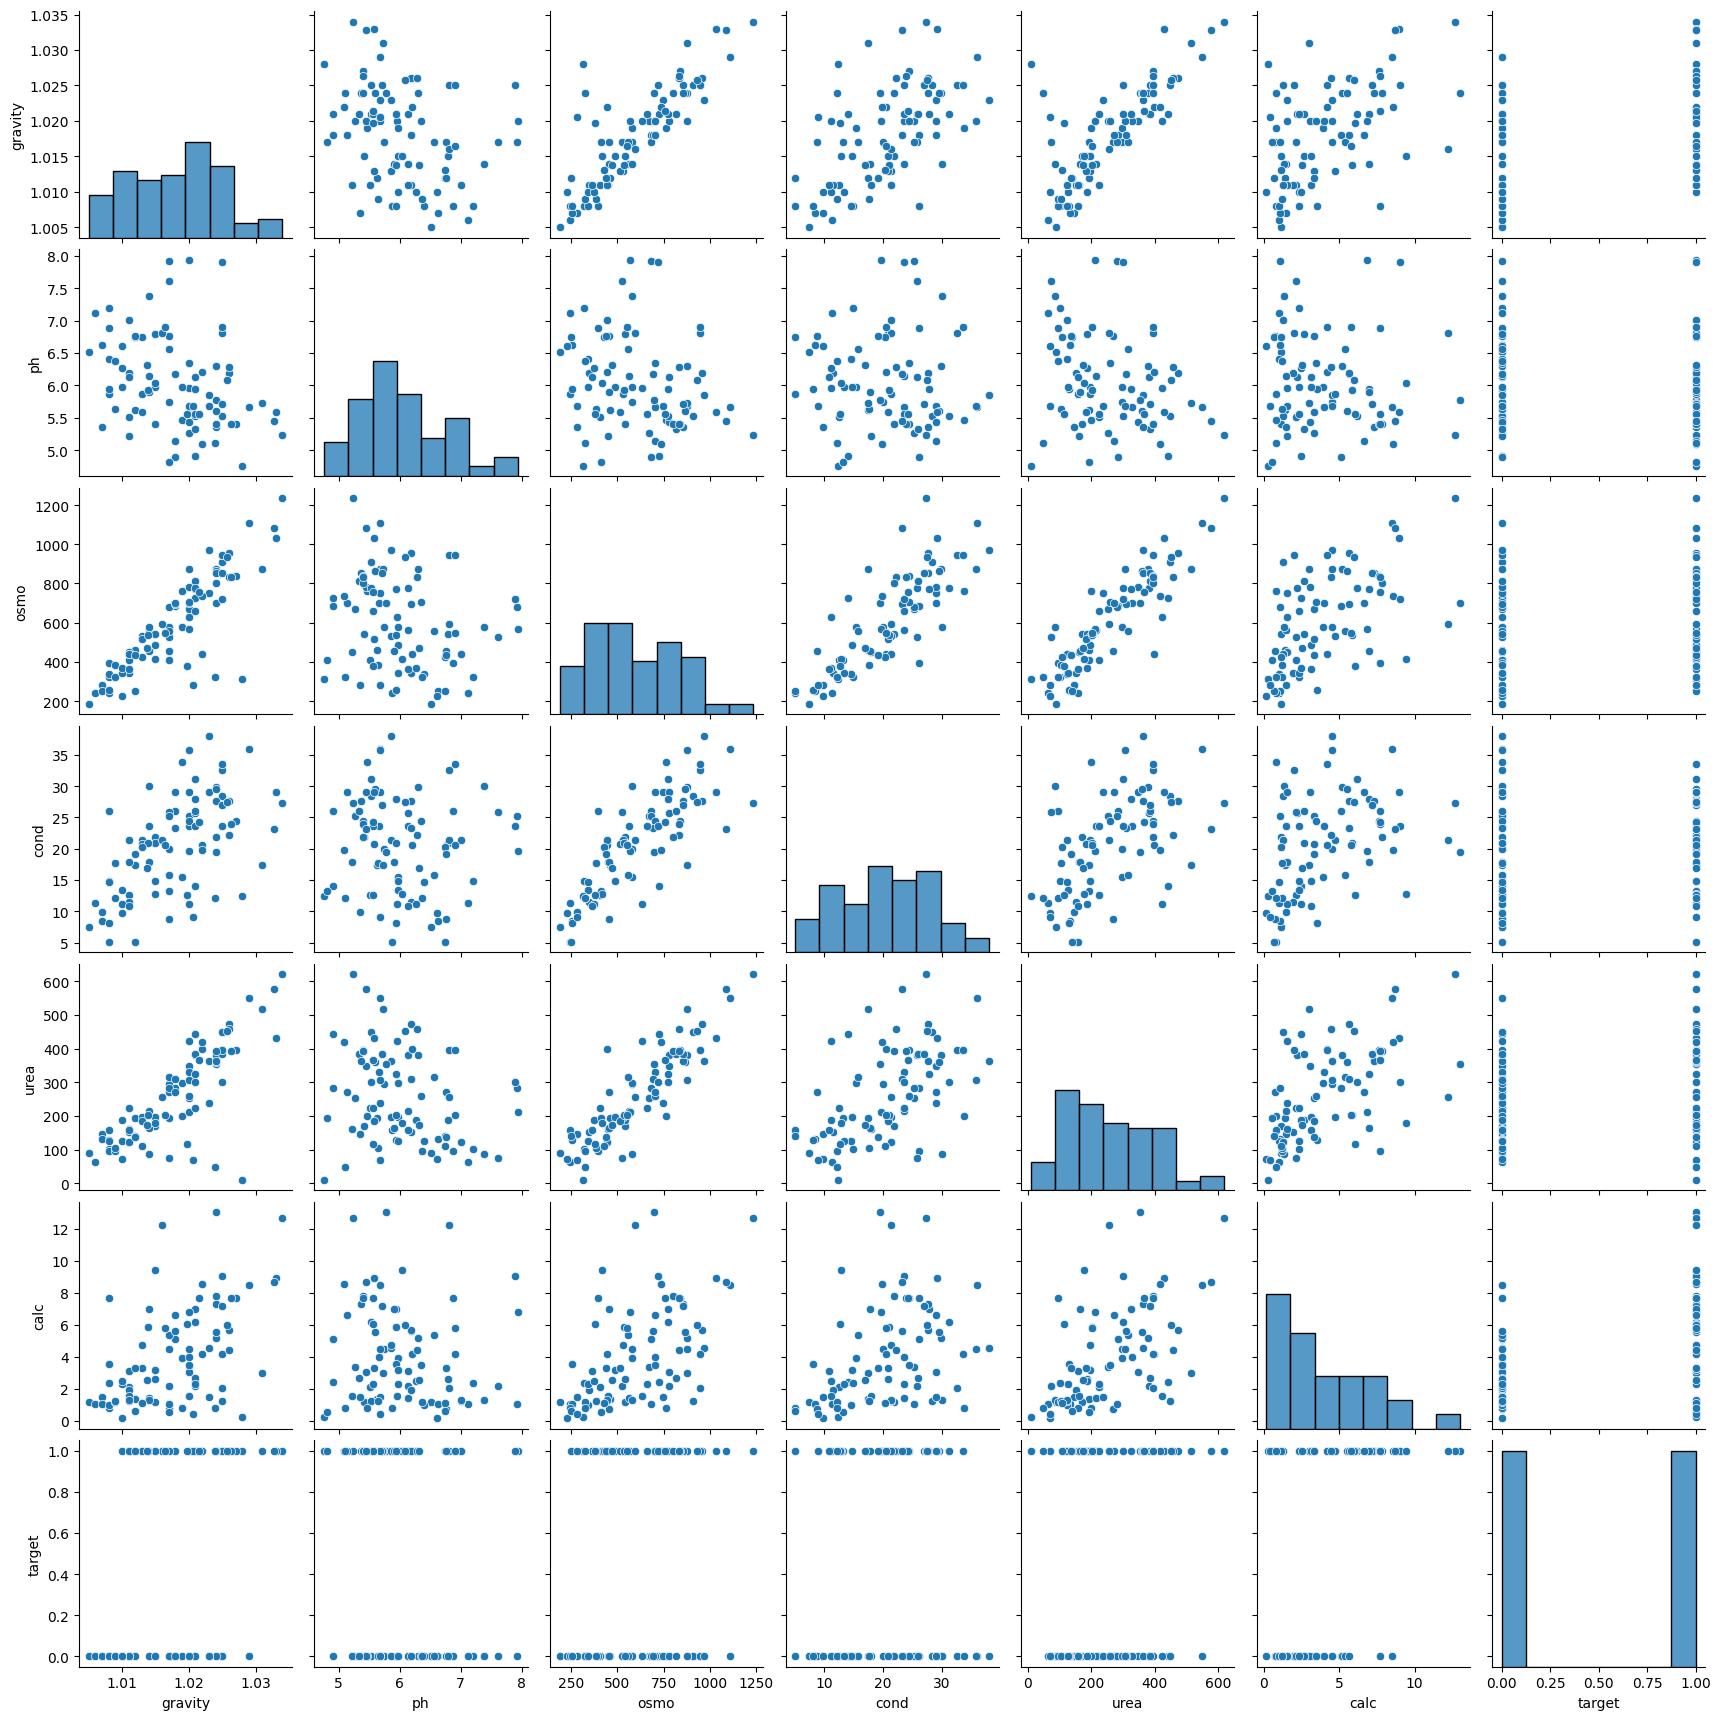

In [ ]:
sns.pairplot(df)

<Axes: >

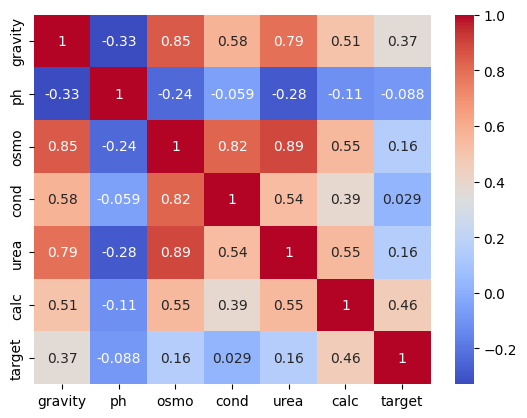

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')

In [ ]:
X = df.iloc[:,0:6].values
y = df['target'].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(72, 6)
(18, 6)
(72,)
(18,)


In [ ]:
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)


In [ ]:
# Let's implement Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train_scaled,y_train)
y_pred1 = model1.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.78      0.88      0.82         8

    accuracy                           0.83        18
   macro avg       0.83      0.84      0.83        18
weighted avg       0.84      0.83      0.83        18



In [ ]:
print(confusion_matrix(y_test,y_pred1))

[[8 2]
 [1 7]]


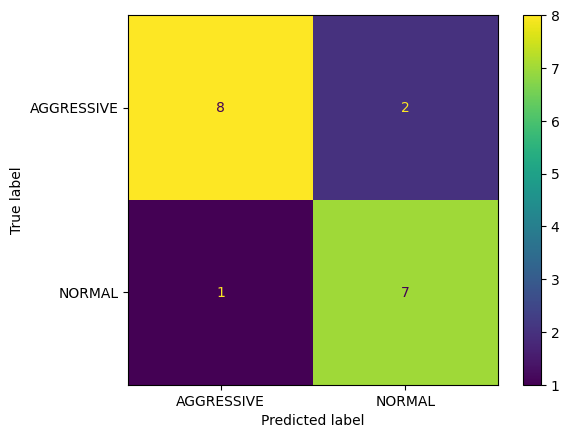

In [ ]:
classes = ['AGGRESSIVE','NORMAL']
disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred1,display_labels=classes)
plt.rcParams['figure.figsize'] = [4,4]
plt.show()

In [ ]:
# Try out with SVM Model
from sklearn.svm import SVC
model2 = SVC(kernel = 'poly')
model2.fit(X_train_scaled,y_train)
y_pred2 = model2.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.70      0.88      0.78         8

    accuracy                           0.78        18
   macro avg       0.79      0.79      0.78        18
weighted avg       0.80      0.78      0.78        18



In [ ]:
print(confusion_matrix(y_test,y_pred2))

[[7 3]
 [1 7]]


In [ ]:
# Let's check model performance with Ensemble techniques
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train_scaled,y_train)
y_pred3 = model3.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.64      0.88      0.74         8

    accuracy                           0.72        18
   macro avg       0.75      0.74      0.72        18
weighted avg       0.76      0.72      0.72        18



In [ ]:
print(confusion_matrix(y_test,y_pred3))

[[6 4]
 [1 7]]


In [ ]:
# as features are multicollinearity hence we have to Normalised featires by adding peanauty to coefficient
from sklearn.linear_model import Lasso
model4 = Lasso(alpha = 0.005)
model4.fit(X_train_scaled,y_train)
y_pred4 = model4.predict(X_test_scaled)

In [ ]:
y_pred4

array([0.27156622, 0.37797202, 0.96575047, 0.40729176, 0.51038352,
       1.05673726, 0.38082797, 0.2545442 , 0.5558801 , 0.80468059,
       0.65881168, 0.23767685, 0.34044798, 0.9898985 , 0.54235315,
       0.60949233, 0.45640335, 0.71597233])

In [ ]:
# We have to Convert float to Binary class to compare between actual and predicted values
y_pred4_binary = np.round(y_pred4)

In [ ]:
y_pred4_binary

array([0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       1.])

In [ ]:
print(classification_report(y_test,y_pred4_binary))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.70      0.88      0.78         8

    accuracy                           0.78        18
   macro avg       0.79      0.79      0.78        18
weighted avg       0.80      0.78      0.78        18



In [ ]:
print(confusion_matrix(y_test,y_pred4_binary))

[[7 3]
 [1 7]]


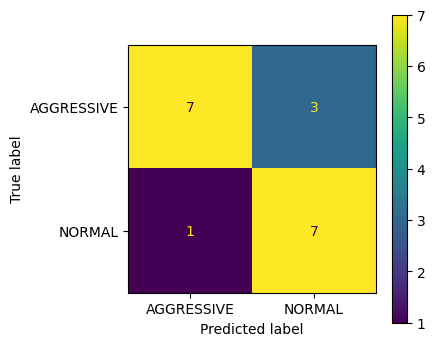

In [ ]:
classes = ['AGGRESSIVE','NORMAL']
disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred4_binary,display_labels=classes)
plt.rcParams['figure.figsize'] = [4,4]
plt.show()